In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import wordcloud as w

In [2]:
#read dataset
df = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

In [3]:
#show dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
#columns dataset
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [6]:
#index dataset
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [7]:
#shape dataset
df.shape

(13490604, 7)

In [8]:
#clearing unnecessary dataset
df.drop(['lsoa_code'], axis=1, inplace=True)

In [9]:
#filter and sorting dataset
df_crime = df[df["value"]>=1]
df_crime = df_crime.sort_values(by=['borough','major_category','minor_category'])
df_crime

,borough,major_category,minor_category,value,year,month
1289,Barking and Dagenham,Burglary,Burglary in Other Buildings,7,2015,3
1741,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2011,10
5186,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2014,1
7329,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2013,2
16134,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2012,2
...,...,...,...,...,...,...
13458470,Westminster,Violence Against the Person,Wounding/GBH,1,2013,5
13460279,Westminster,Violence Against the Person,Wounding/GBH,3,2013,9
13471774,Westminster,Violence Against the Person,Wounding/GBH,2,2008,12
13478506,Westminster,Violence Against the Person,Wounding/GBH,1,2013,9


## Total Crime Yearly 2008-2012

In [10]:
tot_crime = df_crime['value'].sum()
tot_crime

6447758

In [11]:
#show year and number crime
ye_va = df_crime[['year','value']]
ye_va = df_crime.groupby(['year'])['value'].sum()
ye_va

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [12]:
ye_va.loc[2013]

686407

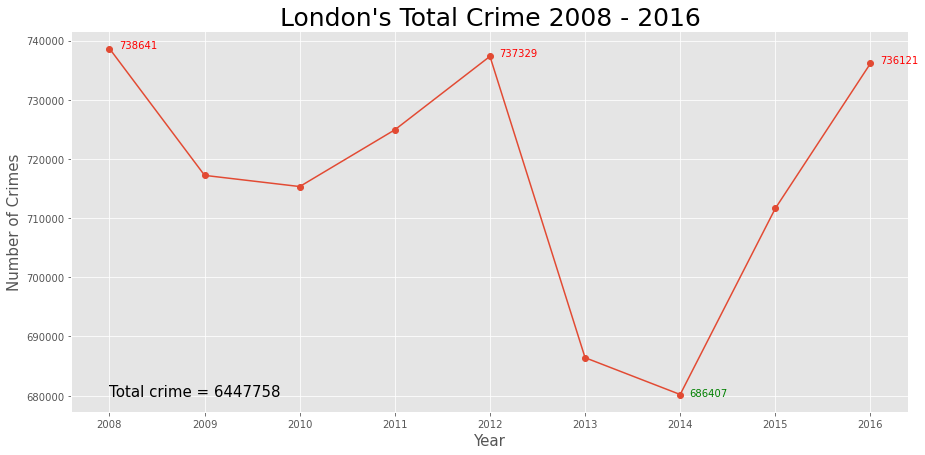

In [13]:
#plot line
mpl.style.use(['ggplot'])
ye_va.plot(
    kind='line',
    marker="o",
    legend=False,
    figsize=(15,7)
)

plt.title("London's Total Crime 2008 - 2016", size=25)
plt.xlabel("Year",size=15)
plt.ylabel('Number of Crimes',size=15)

#annotate lowest
plt.text(2014.1,680000,ye_va.loc[2013],color='green',size=10)
#annotate highest highest 
plt.text(2008.1,738641,ye_va.loc[2008],color='red',size=10)
plt.text(2012.1,737329,ye_va.loc[2012],color='red',size=10)
plt.text(2016.1,736121,ye_va.loc[2016],color='red',size=10)
#annotate total crime
plt.text(2008,680000,"Total crime =" ,color='black',size=15)
plt.text(2009.1,680000, tot_crime,color='black',size=15)



plt.show()

Grafik ini menunjukan jumlah kejahatan terendah di tahun 2008-2016 terjadi di tahun 2014 sebanyak 686407 kasus, untuk 3 tertinggi terjadi di tahun 2016,2012,2008

In [14]:
ye_va_box = df_crime[['year','value']]
ye_va_box = df_crime.groupby(['year']).sum()
ye_va_box

,value,month
year,,
2008,738641,2518964
2009,717214,2478373
2010,715324,2457347
2011,724915,2476825
2012,737329,2445556
2013,686407,2378520
2014,680183,2435433
2015,711624,2505648
2016,736121,2565161


## Number Crimes per Borough

In [15]:
#show number crimse per borough
bo_va = df_crime[['borough','value']]
bo_va = bo_va.groupby(['borough']).sum()
bo_va


,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


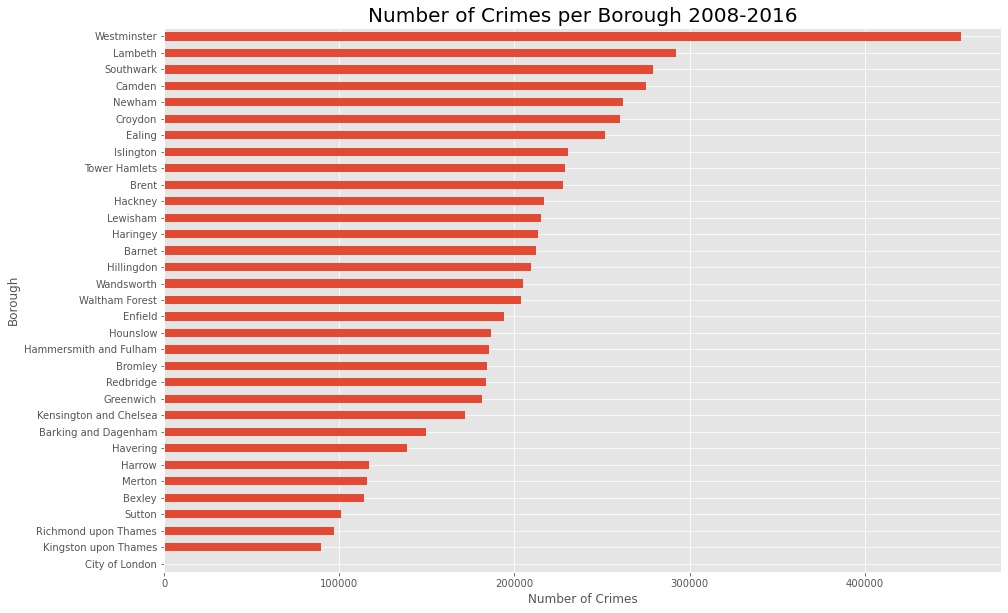

In [16]:
#plot barh
bo_va.sort_values(['value']).plot(
    kind='barh',
    figsize=(15,10),
    legend=None,
)

plt.title('Number of Crimes per Borough 2008-2016',size=20)
plt.xlabel('Number of Crimes')
plt.ylabel('Borough')
plt.show()

Grafik ini menunjukan jumlah kejahatan per borough tahun 2008-2016 dengan jumlah tertinggi terjadi di Westminster, untuk borough dengan jumlah kejahtan terendah terjadi di City of London

## Major Category Crime 2008-2016

In [17]:
#show number of crimes by major category
ma_va = df_crime[['major_category','value']]
ma_va = ma_va.groupby(['major_category']).sum()
ma_va 

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


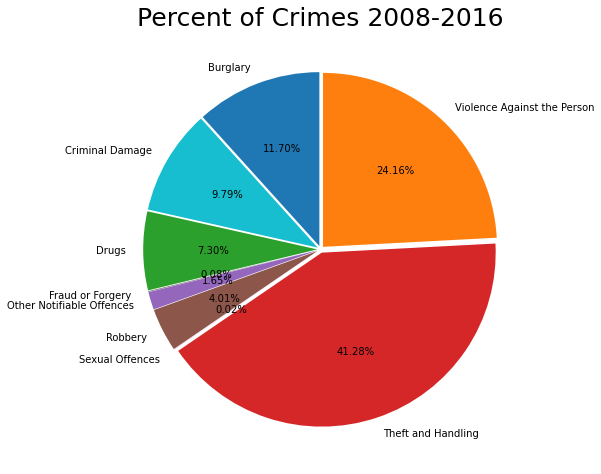

In [18]:
#plot pie
colors=['tab:blue', 'tab:cyan', 'tab:green', 'tab:gray', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:red', 'tab:orange']
ma_va['value'].plot(
    kind='pie',
    figsize=(15,8),
    legend=None,
    autopct='%1.2f%%', 
    startangle=90,          
    label=None,
    colors=colors,
    explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]
)

plt.title('Percent of Crimes 2008-2016',size=25)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Grafik percentase kriminal tahun 2008-2016, dengan kejahatan tertinggi adalah "Theft and Handling" sebesar 41.28%

## Total crime monthly top 5 borough

In [19]:
#Westminster, Lambeth, Southwark, Camden, Newham number crime monthly
#Westminster monthly
wes = df_crime[(df_crime['borough']=='Westminster')]  
wes = wes[['value','month']]
wes = wes.groupby(['month'])["value"].sum()
wes = pd.DataFrame([wes]).transpose()
wes = wes.rename(columns={'value':"Westminster"})
wes

,Westminster
month,
1,37928
2,34713
3,38349
4,35934
5,37661
6,37216
7,40293
8,38090
9,35608


In [20]:
#Lambeth over monthly
lam = df_crime[(df_crime['borough']=='Lambeth')]  
lam = lam[['value','month']]
lam = lam.groupby(['month'])["value"].sum()
lam = pd.DataFrame([lam]).transpose()
lam = lam.rename(columns={'value':"Lambeth"})
lam

,Lambeth
month,
1,24057
2,21815
3,24379
4,23736
5,24795
6,25242
7,25692
8,25020
9,24214


In [21]:
#Southwark monthly
sou = df_crime[(df_crime['borough']=='Southwark')] 
sou = sou[['value','month']]
sou = sou.groupby(['month'])["value"].sum()
sou = pd.DataFrame([sou]).transpose()
sou = sou.rename(columns={'value':"Southwark"})
sou 

,Southwark
month,
1,22776
2,21518
3,23301
4,22248
5,24127
6,24205
7,24553
8,23847
9,22926


In [22]:
#Camden monthly
cam = df_crime[(df_crime['borough']=='Camden')]
cam = cam[['value','month']]
cam = cam.groupby(['month'])["value"].sum()
cam = pd.DataFrame([cam]).transpose()
cam = cam.rename(columns={'value':"Camden"})
cam

,Camden
month,
1,22288
2,21332
3,24027
4,22305
5,24181
6,23514
7,24133
8,21900
9,21731


In [23]:
#Newham monthly
new = df_crime[(df_crime['borough']=='Newham')]
new = new[['value','month']]
new = new.groupby(['month'])["value"].sum()
new = pd.DataFrame([new]).transpose()
new = new.rename(columns={'value':"Newham"})
new

,Newham
month,
1,21612
2,20462
3,22749
4,20887
5,21901
6,21967
7,22758
8,21683
9,21345


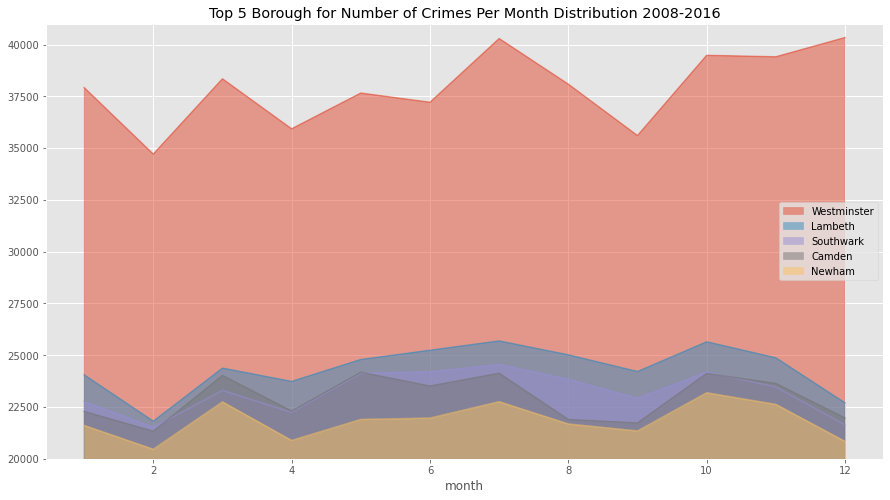

In [24]:
fig, axes = plt.subplots(figsize=(15,8))

ax1 = wes.plot(use_index=True, y='Westminster', kind='area', alpha=0.5, ax=axes)
ax2 = lam.plot(use_index=True, y='Lambeth', kind='area', alpha=0.5, ax=axes)
ax3 = sou.plot(use_index=True, y='Southwark', kind='area', alpha=0.5, ax=axes)
ax4 = cam.plot(use_index=True, y='Camden', kind='area', alpha=0.5, ax=axes)
ax5 = new.plot(use_index=True, y='Newham', kind='area', alpha=0.5, ax=axes)


plt.title("Top 5 Borough for Number of Crimes Per Month Distribution 2008-2016")
plt.grid(linewidth=1)
plt.ylim([20000,41000])
plt.show()


Grafik adalah distibusi kejahatan per bulan untuk 5 borough teratas, dapat dilihat ada kesamaan pola jumlah kejahatan terhadap bulannya, bulan feb kejahatan menurun lalu kembali naik di bulan berikutnya, dan turun di bulan april, dan seterusnya

## Cloropleth Map 2016

In [25]:
#data tahun 2016
df_crime_16 = df_crime[df_crime['year']==2016]
df_crime_16

,borough,major_category,minor_category,value,year,month
81691,Barking and Dagenham,Burglary,Burglary in Other Buildings,3,2016,5
139419,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2016,1
173222,Barking and Dagenham,Burglary,Burglary in Other Buildings,3,2016,7
186071,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2016,9
214626,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2016,1
...,...,...,...,...,...,...
13256612,Westminster,Violence Against the Person,Wounding/GBH,3,2016,8
13300926,Westminster,Violence Against the Person,Wounding/GBH,1,2016,3
13326798,Westminster,Violence Against the Person,Wounding/GBH,1,2016,12
13358223,Westminster,Violence Against the Person,Wounding/GBH,2,2016,10


In [26]:
#data 2016 crime per borough
bo_va_16 = df_crime_16[['borough','value']]
bo_va_16 = df_crime_16.groupby(['borough']).sum()
bo_va_16 = bo_va_16.reset_index()
bo_va_16

,borough,value,year,month
0,Barking and Dagenham,16741,19724544,63033
1,Barnet,24684,29570688,94780
2,Bexley,12840,16621920,54407
3,Brent,26693,30199680,98444
4,Bromley,20164,24151680,78096
5,Camden,29183,25466112,82550
6,City of London,178,245952,863
7,Croydon,28712,32768064,106525
8,Ealing,27127,30812544,99968
9,Enfield,22485,27534528,89051


In [27]:
london_geo = r'./dataset/london_boroughs.json'

In [28]:
london_map = folium.Map(location=[51.5150635,-0.1057543], zoom_start=10, tiles='Mapbox Bright')
london_map.choropleth(
    geo_data=london_geo,
    data=bo_va_16,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crimes in 2016',
    reset=True
)

folium.TileLayer('Stamen Terrain',name="Light Map",control=False).add_to(london_map)

london_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Word CLoud Minor Category Crime

In [29]:
#word cloud minor category Crime
min = df_crime_16.groupby(['minor_category']).sum()
min = min.reset_index()
min

,minor_category,value,year,month
0,Assault with Injury,50038,55776672,179758
1,Burglary in Other Buildings,25289,31945536,102638
2,Burglary in a Dwelling,42996,54782784,177250
3,Business Property,1654,3070368,10187
4,Common Assault,64440,63112896,203577
5,Criminal Damage To Dwelling,13951,23252544,75404
6,Criminal Damage To Motor Vehicle,25787,36771840,119828
7,Criminal Damage To Other Building,6700,10797696,33988
8,Drug Trafficking,3392,5568192,16992
9,Going Equipped,604,1141056,3707


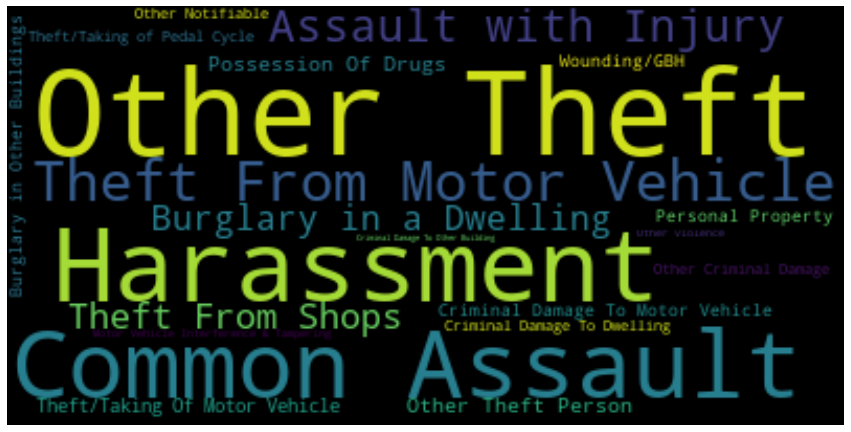

In [30]:
#word cloud
d = dict(zip(min.minor_category, min.value))
wordcloud = w.WordCloud(
    collocations=False, 
    background_color='black'
).generate_from_frequencies(d)


plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


Dari wordcloud di atas dapat dilihat 3 kejahatan teratas di tahun 2016 yaitu Common Assault, Harassment dan Other Theft

## Box Plot Common Assault 2016

In [31]:
#data Common Assault 2016
co_as = df_crime_16[(df_crime_16['minor_category']=='Common Assault')]
co_as = co_as[['value','month']]
co_as = co_as.groupby(['month'])["value"].sum()
co_as = pd.DataFrame([co_as]).transpose()
co_as = co_as.rename(columns={'value':"Common Assault"})
co_as

,Common Assault
month,
1,5158
2,5038
3,5388
4,5238
5,5814
6,5546
7,5699
8,5172
9,5216


In [32]:
co_as.describe()

,Common Assault
count,12.000000
mean,5370.000000
std,229.014092
min,5038.000000
25%,5205.000000
50%,5366.500000
75%,5465.000000
max,5814.000000


In [33]:
co_as.median()

Common Assault    5366.5
dtype: float64

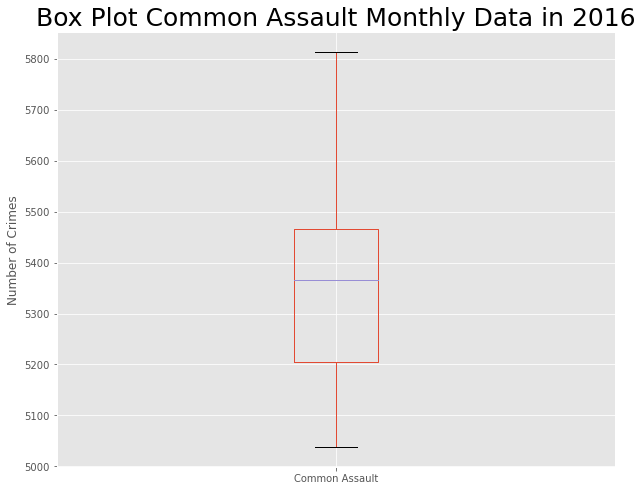

In [34]:
co_as.plot(
    kind='box',
    figsize=(10,8)
)

plt.title('Box Plot Common Assault Monthly Data in 2016',size=25)
plt.xlabel(None)
plt.ylabel('Number of Crimes')
plt.show()


Box plot diatas menunjukan kejahatan "Common Assault" tahun 2016 dari data bulanan, dengan minimum 5038, maksimum 5814, Inter Quartile Range (IQR) 5205-5465 dan median 5366.5